In [1]:
from gurobipy import *
import numpy as np
import matplotlib.pyplot as plt

### Assignment 3 Question 1:

In [2]:
#########Model Set-up Using Function###############
def model_setup():
    
    m = Model("Process_Flexi")
    
    # number of weeks to offer price level i
    x = m.addVars(ARCS, name = "x")

    # set objective
    m.setObjective( quicksum(x[i,j] for (i,j) in ARCS), GRB.MAXIMIZE)

    # capcity constraint: 
    m.addConstrs( ( quicksum(x[i,j] for (i,j) in ARCS.select(i,'*')) <= supply[i] for i in range(N)), "capacity")

    # demand constraint: 
    m.addConstrs( ( quicksum(x[i,j] for (i,j) in ARCS.select('*',j)) <= demand[j] for j in range(M) ), "demand")
    
    #Supressing the optimization output
    m.setParam( 'OutputFlag', False )
    
    return m

In [3]:
#########Parameters Set-up###############
#supply and demand
supply = np.array([100, 100, 100, 100, 100, 100])

#mean of the demand
mean = np.array([100, 100, 100, 100, 100, 100])

#covariance matrix of the demand (independent with s.d. 30)
cov = np.array([[900, 0, 0, 0, 0, 0], 
                [0, 900, 0, 0, 0, 0],
                [0, 0, 900, 0, 0, 0],
                [0, 0, 0, 900, 0, 0],
                [0, 0, 0, 0, 900, 0],
                [0, 0, 0, 0, 0, 900]])

N = len(supply)
M = len(mean)
Sample_Size = 1000

Academic license - for non-commercial use only
Average maximum sales for open chain: 555.7554077588462


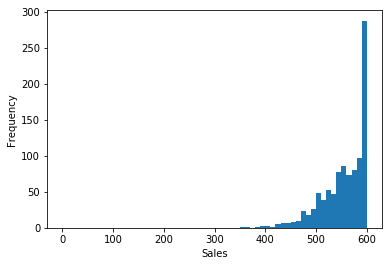

In [4]:
#########Evaluate the Open Chain Design############
ARCS = tuplelist([(0,0), (0,1), 
                  (1,1), (1,2),
                  (2,2), (2,3), 
                  (3,3), (3,4), 
                  (4,4), (4,5),
                  (5,5)])


sales_open = np.zeros(Sample_Size)


for i in range(Sample_Size):
    
    # demand is sampled from multivariate normal distribution with mean and cov (and truncated above zero)
    demand = np.maximum(np.random.multivariate_normal(mean, cov), 0)
    
    # setup the model again
    m = model_setup()

    # solving the model
    m.optimize()
    
    # store the maximum sales for the i-th sample
    sales_open[i] = m.objVal

# compute the average of maximum sales
avg_sales_open = np.average(sales_open)    

print('Average maximum sales for open chain:', avg_sales_open)

# visiualizing the average sales
plt.hist(sales_open, bins = 60, range = (0, 600))
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

Average maximum sales for long chain: 571.6267393111295


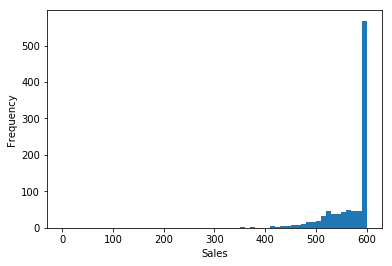

In [5]:
#########Evaluate the Long Chain Design############
ARCS = tuplelist([(0,0), (0,1), 
                  (1,1), (1,2),
                  (2,2), (2,3), 
                  (3,3), (3,4), 
                  (4,4), (4,5),
                  (5,5), (5,0)])


sales_long = np.zeros(Sample_Size)


for i in range(Sample_Size):
    
    # demand is sampled from multivariate normal distribution with mean and cov (and truncated above zero)
    demand = np.maximum(np.random.multivariate_normal(mean, cov), 0)
    
    # setup the model again
    m = model_setup()

    # solving the model
    m.optimize()
    
    # store the maximum sales for the i-th sample
    sales_long[i] = m.objVal

# compute the average of maximum sales
avg_sales_long = np.average(sales_long)    

print('Average maximum sales for long chain:', avg_sales_long)

# visiualizing the average sales
plt.hist(sales_long, bins = 60, range = (0, 600))
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

### Assignment 3 Question 2:
General model formulation for the problem: let $p_j$ be the selling price at demand location $j$ and $c_i$ be the procurement cost at supply location $i$ and $t_{ij}$ be the transporation cost from supply location $i$ to demand location $j$, we then have
\begin{equation}
\begin{split}
\max~ & \sum_{(i,j)\in A}(p_j - t_{ij})x_{ij} - \sum_{i=1}^n c_is_i\\
s.t. ~& \sum_{j:(i,j)\in A}x_{ij} \leq s_i\\
& \sum_{i:(i,j)\in A}x_{ij} \leq d_j\\
& x_{ij}\geq 0,
\end{split}
\end{equation}

In [6]:
#########Model Set-up Using Function###############
def model_setup():
    
    m = Model("Newsvendor")
    
    # number of weeks to offer price level i
    x = m.addVars(ARCS, name = "x")

    # set objective
    m.setObjective( quicksum((p[j] - t[i,j])*x[i,j] for (i,j) in ARCS) - quicksum(c[i]*supply[i] for i in range(N)), GRB.MAXIMIZE)

    # capcity constraint: 
    m.addConstrs( ( quicksum(x[i,j] for (i,j) in ARCS.select(i,'*')) <= supply[i] for i in range(N)), "capacity")

    # demand constraint: 
    m.addConstrs( ( quicksum(x[i,j] for (i,j) in ARCS.select('*',j)) <= demand[j] for j in range(M) ), "demand")
    
    #Supressing the optimization output
    m.setParam( 'OutputFlag', False )
    
    return m


In [7]:
#########Parameters Set-up###############
#supply available at each location
supply = np.array([300, 500, 500])

#procurement cost at each location
c = np.array([50, 50, 50])

#selling price at each location
p = np.array([100, 100, 100])

#mean of the demand
mean = np.array([300, 500, 500])

#covariance matrix of the demand 
cov = np.array([[400, 0, 0], 
                [0, 400, 0],
                [0, 0, 1600]])

#transporation cost
t = np.array([[0, 22, 19], 
              [22, 0, 7],
              [19, 7, 0]])

N = len(supply)
M = len(mean)
Sample_Size = 1000

#### The case when no transshipments are made

Average profit without transshipment: 61956.8825000772


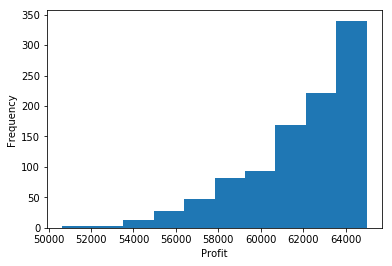

In [8]:
#########System without Transshipment############

ARCS = tuplelist([(0,0), (1,1), (2,2)])

profit = np.zeros(Sample_Size)


for i in range(Sample_Size):
    
    # demand is sampled from multivariate normal distribution with mean and cov (and truncated above zero)
    demand = np.maximum(np.random.multivariate_normal(mean, cov), 0)
    
    # setup the model again
    m = model_setup()

    # solving the model
    m.optimize()
    
    # store the maximum sales for the i-th sample
    profit[i] = m.objVal

# compute the average of maximum sales
avg_profit = np.average(profit)    

print('Average profit without transshipment:', avg_profit)

# visiualizing the average sales
plt.hist(profit)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()


#### The case when transshipments are made

Average profit with transshipment: 62960.20407800689


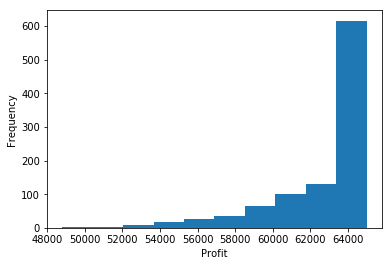

In [9]:
#########System with Transshipment############

ARCS = tuplelist([(0,0), (0,1), (0,2),
                  (1,0), (1,1), (1,2),
                  (2,0), (2,1), (2,2)])

profit_transship = np.zeros(Sample_Size)


for i in range(Sample_Size):
    
    # demand is sampled from multivariate normal distribution with mean and cov (and truncated above zero)
    demand = np.maximum(np.random.multivariate_normal(mean, cov), 0)
    
    # setup the model again
    m = model_setup()

    # solving the model
    m.optimize()
    
    # store the maximum sales for the i-th sample
    profit_transship[i] = m.objVal

# compute the average of maximum sales
avg_profit_transship = np.average(profit_transship)    

print('Average profit with transshipment:', avg_profit_transship)

# visiualizing the average sales
plt.hist(profit_transship)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

### Assignment 3 Question 5:
#### Ignoring the time window constraint

In [10]:
#########Parameters Set-up############

#traveling cost from node i to node j
cost = np.array([[1000, 3, 3, 10, 9, 10],
                 [3, 1000, 3, 7, 6, 7], 
                 [3, 3, 1000, 7, 6, 7],
                 [10, 7, 7, 1000, 1, 2],
                 [9, 6, 6, 1, 1000, 1], 
                 [10, 7, 7, 2, 1, 1000]])

time = np.array([0, 5, 10, 15, 13, 14])

N = cost.shape[0]

#the big M
M = 10000

In [11]:
#########Model Set-up############


tsp_tw = Model("traveling_salesman_timewindow")

# Creat variables
x = tsp_tw.addVars(N, N, vtype=GRB.BINARY, name = "x")

u = tsp_tw.addVars(N, name = "u")

# Set objective
tsp_tw.setObjective( quicksum(cost[i,j]*x[i,j] for i in range(N) for j in range(N)), GRB.MINIMIZE)

# Assignment constraints:
tsp_tw.addConstrs(( quicksum(x[i,j] for j in range(N)) == 1 for i in range(N) ))
 
tsp_tw.addConstrs(( quicksum(x[i,j] for i in range(N)) == 1 for j in range(N) ))

# Subtour-breaking constraints:
tsp_tw.addConstrs(( u[i] + cost[i,j] - u[j] <= M*(1 - x[i,j])  for i in range(N) for j in range(1,N) ))


# Solving the model
tsp_tw.optimize()


Optimize a model with 42 rows, 42 columns and 152 nonzeros
Variable types: 6 continuous, 36 integer (36 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+04]
Found heuristic solution: objective 34.0000000
Presolve removed 5 rows and 7 columns
Presolve time: 0.02s
Presolved: 37 rows, 35 columns, 150 nonzeros
Variable types: 5 continuous, 30 integer (30 binary)

Root relaxation: objective 1.300000e+01, 18 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   13.00000    0    6   34.00000   13.00000  61.8%     -    0s
H    0     0                      22.0000000   13.00000  40.9%     -    0s
     0     0   13.00000    0    6   22.00000   13.00000  40.9%     -    0s
     0     0   13.00000    0    6   22.00000   13.00000  40.9%     -    0s
  

In [12]:
#  Print optimal x for x nonzero and optimal value
s_edge = []
for v in x:    
    if x[v].x > 0.001:
        edge = np.add(v, (1,1))
        s_edge.append(edge)
        
#  Obtain the permutation as a representation of the tour
permu = np.ones(N)
predecessor = 1
for i in range(N):
    for s in s_edge:
        if s[0] == predecessor:
            permu[i] = s[0]
            predecessor = s[1]
            break    
    
print(permu)

[1. 2. 5. 4. 6. 3.]


#### Adding the time window constraint

In [13]:
# Timewindow constraints:
tsp_tw.addConstrs(( u[i] <= time[i]  for i in range(N)  ))

# Solving the model
tsp_tw.optimize()


Optimize a model with 48 rows, 42 columns and 158 nonzeros
Variable types: 6 continuous, 36 integer (36 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+04]

MIP start did not produce a new incumbent solution

Presolve removed 22 rows and 17 columns
Presolve time: 0.00s
Presolved: 26 rows, 25 columns, 134 nonzeros
Variable types: 4 continuous, 21 integer (21 binary)

Root relaxation: objective 1.300000e+01, 15 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   13.00000    0    6          -   13.00000      -     -    0s
H    0     0                      25.0000000   13.00000  48.0%     -    0s
     0     0   13.00000    0    6   25.00000   13.00000  48.0%     -    0s
     0     0   13.00000    0    6   25.00000   13.00000  48.0%     - 

In [15]:
#  Print optimal x for x nonzero and optimal value
s_edge = []
for v in x:    
    if x[v].x > 0.001:
        edge = np.add(v, (1,1))
        s_edge.append(edge)
        
#  Obtain the permutation as a representation of the tour
permu = np.ones(N)
predecessor = 1
for i in range(N):
    for s in s_edge:
        if s[0] == predecessor:
            permu[i] = s[0]
            predecessor = s[1]
            break    
    
print(permu)

[1. 2. 3. 5. 6. 4.]
